In [1]:
import numpy as np
import os,sys
import math
import matplotlib.pyplot as plt

In [2]:
exp_type = 'compare_sigma_rate_0729'
data_path = os.path.join(os.getcwd(),os.pardir,'results',exp_type)

In [3]:
# [n_pi_ampls, num_simulation, n_methods]
z_est_arrays = np.load(os.path.join(data_path,'z_est_arrays.npy')) 
# [n_pi_ampls, num_simulation, n_methods, M]
phi_est_arrays = np.load(os.path.join(data_path,'phi_est_arrays.npy'))

In [4]:
n_rate_ampls, num_simulation, n_methods, M = phi_est_arrays.shape

In [5]:

# method: GOP, NET, MAP
z_est_GOP = z_est_arrays[:,:,0]
z_est_MAP = z_est_arrays[:,:,1]
z_est_LSC = z_est_arrays[:,:,2]

phi_est_GOP = phi_est_arrays[:,:,0,:]
phi_est_MAP = phi_est_arrays[:,:,1,:]

In [6]:
print(z_est_GOP.shape)

(13, 25)


In [7]:
mean_z_est_GOP = np.mean(z_est_GOP, axis=1)
mean_z_est_MAP = np.mean(z_est_MAP, axis=1)
mean_z_est_LSC = np.mean(z_est_LSC, axis=1)

sem_z_est_GOP = np.std(z_est_GOP, axis=1)/np.sqrt(num_simulation)
sem_z_est_MAP = np.std(z_est_MAP, axis=1)/np.sqrt(num_simulation)
sem_z_est_LSC = np.std(z_est_LSC, axis=1)/np.sqrt(num_simulation)


In [8]:
# coompute the square error
z_gt = 99.5
lambda_gs = np.array([3,7,10])
phi_gt = np.mod(z_gt/lambda_gs,1) * 2 * np.pi
print('phi_gt:',phi_gt, 'z_gt:',z_gt)

phi_gt: [1.04719755 1.34639685 5.96902604] z_gt: 99.5


In [9]:
# calculate the square error for z for each method
z_se_GOP = np.mean((z_est_GOP - z_gt)**2, axis=1)
z_se_MAP = np.mean((z_est_MAP - z_gt)**2, axis=1)
z_se_LSC = np.mean((z_est_LSC - z_gt)**2, axis=1)

# sqrt of the square error
z_rmse_GOP = np.sqrt(z_se_GOP)
z_rmse_MAP = np.sqrt(z_se_MAP)
z_rmse_LSC = np.sqrt(z_se_LSC)

In [10]:
rate_ampls = np.array([0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 5., 6., 8., 10., 12.])

In [11]:
save_path = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_path):
    os.makedirs(save_path)

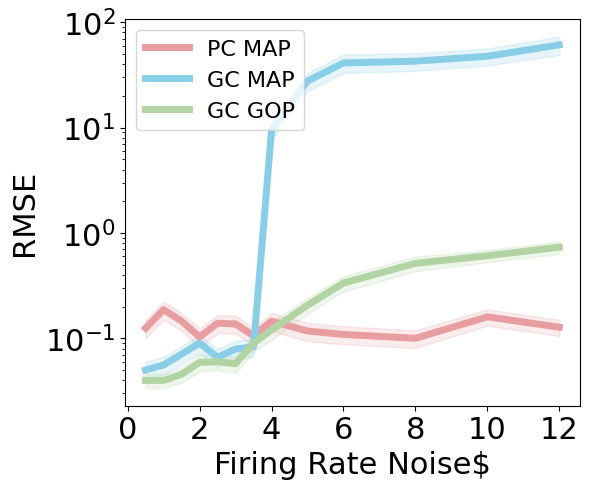

In [15]:
fontsize = 22
linewidth = 5.
figsize=(6, 5)
legend_fontsize = 16
# color = ['#F5E09B', '#9ec6db', '#B19CD9']
color = ['#E89DA0','#88CEE6','#B2D3A4']

plt.figure(figsize=figsize)
# plot the sqrt of the square error for z for each method
plt.plot(rate_ampls,z_rmse_LSC, label='PC MAP', linewidth=linewidth, color=color[0])
plt.plot(rate_ampls,z_rmse_MAP, label='GC MAP', linewidth=linewidth, color=color[1])
plt.plot(rate_ampls,z_rmse_GOP, label='GC GOP', linewidth=linewidth, color=color[2])
# plot error bar
plt.fill_between(rate_ampls, z_rmse_LSC-sem_z_est_LSC, z_rmse_LSC+sem_z_est_LSC, alpha=0.2, color=color[0])
plt.fill_between(rate_ampls, z_rmse_MAP-sem_z_est_MAP, z_rmse_MAP+sem_z_est_MAP, alpha=0.2, color=color[1])
plt.fill_between(rate_ampls, z_rmse_GOP-sem_z_est_GOP, z_rmse_GOP+sem_z_est_GOP, alpha=0.2, color=color[2])

# log scale for y axis
plt.yscale('log')
plt.xlabel('Firing Rate Noise$', fontsize=fontsize)
plt.ylabel('RMSE', fontsize=fontsize)
plt.legend(fontsize=legend_fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()
plt.savefig(os.path.join(save_path,'vary_sigma_rate.png'))
plt.show()